In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')
print(강서_대여소_ID)

      대여소_ID
0     ST-975
1     ST-837
2     ST-836
3     ST-835
4     ST-834
..       ...
219  ST-1066
220  ST-1065
221  ST-1064
222  ST-1063
223  ST-1062

[224 rows x 1 columns]


In [107]:
따릉이대여소_마스터정보 = pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')
print(따릉이대여소_마스터정보)

       대여소_ID                      주소1            주소2         위도          경도
0      ST-999       서울특별시 양천구 목동서로 280  목동아파트 8단지 상가동   0.000000    0.000000
1      ST-998       서울특별시 양천구 목동서로 130  목동아파트 4단지 상가동   0.000000    0.000000
2      ST-997       서울특별시 양천구 목동중앙로 49  목동3단지 시내버스정류장  37.534390  126.869598
3      ST-996   서울특별시 양천구 남부순환로88길5-16     양강중학교앞 교차로  37.524334  126.850548
4      ST-995  서울특별시 양천구 중앙로 153 공중화장실            NaN  37.510597  126.857323
...       ...                      ...            ...        ...         ...
3281  ST-1002     서울특별시 양천구 목동동로 316-6   서울시 도로환경관리센터  37.529900  126.876541
3282  ST-1001      서울특별시 양천구 남부순환로4길20        서서울호수공원   0.000000    0.000000
3283  ST-1000        서울특별시 양천구 신정동 236    서부식자재마트 건너편  37.510380  126.866798
3284   ST-100       서울특별시 광진구 아차산로 262    더샵스타시티 C동 앞  37.536667  127.073593
3285    ST-10         서울특별시 마포구 양화로 93            427  37.552746  126.918617

[3286 rows x 5 columns]


In [108]:
강서_마스터정보 = 따릉이대여소_마스터정보[따릉이대여소_마스터정보['대여소_ID'].isin(강서_대여소_ID['대여소_ID'])]

In [109]:
강서_마스터정보 = 강서_마스터정보.reset_index()

In [110]:
강서_마스터정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   224 non-null    int64  
 1   대여소_ID  224 non-null    object 
 2   주소1     224 non-null    object 
 3   주소2     80 non-null     object 
 4   위도      224 non-null    float64
 5   경도      224 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.6+ KB


In [111]:
강서_마스터정보 = 강서_마스터정보.drop('index',axis=1)
강서_마스터정보

,대여소_ID,주소1,주소2,위도,경도
0,ST-975,서울특별시 강서구 마곡서1로 111-12,신방화역환승주차장,37.567284,126.818275
1,ST-837,서울특별시 강서구 강서로 지하 54,강서구 화곡동 662-5,37.532551,126.846321
2,ST-836,서울특별시 강서구 곰달래로37길 13,강서구곰달래로37길 13,37.531780,126.854485
3,ST-835,서울특별시 강서구 강서로 304,강서구 내발산동 724-42,37.552914,126.836571
4,ST-834,서울특별시 강서구 공항대로 329,강서구 등촌동 675-7,37.558197,126.844261
...,...,...,...,...,...
219,ST-1066,서울특별시 서울 강서구 내발산동 741-8,마곡수명산파크2단지 교차로,0.000000,0.000000
220,ST-1065,서울특별시 강서구 마곡동 797-5,NaN,37.558949,126.837173
221,ST-1064,서울특별시 강서구 마곡동 728-168,마곡역7번출구,37.558311,126.826523
222,ST-1063,서울특별시 강서구 공항대로 163 마곡역(5호선),NaN,37.560207,126.824142


In [112]:
출퇴근_통합정보 = pd.read_csv('./출퇴근시간_대여소_이용량_통합 - 출퇴근시간_대여소_이용량.csv',encoding='utf-8')
print(출퇴근_통합정보)

     Unnamed: 0   대여소_ID 지구 분류(출근) 지구 분류(퇴근) 일치여부  강서_데이터_시작(출근)  \
0             0  ST-1062        주거        주거   일치         3817.0   
1             1  ST-1063        업무        업무   일치         5061.0   
2             2  ST-1064        업무        업무   일치         3900.0   
3             3  ST-1065        주거        주거   일치         5849.0   
4             4  ST-1067        주거        주거   일치         3604.0   
..          ...      ...       ...       ...  ...            ...   
190         190   ST-829        주거        업무  불일치         1344.0   
191         191   ST-831        주거        주거   일치         2732.0   
192         192   ST-834        업무        주거  불일치         3344.0   
193         193   ST-835        주거        주거   일치         4274.0   
194         194   ST-975        주거        주거   일치         2979.0   

     강서_데이터_종료(출근)  차이(출근)  차이 절대값(출근)  총 이용량(시작 + 종료)(출근)  강서_데이터_시작(퇴근)  \
0           2303.0  1514.0      1514.0              6120.0           4052   
1           8806.0 -3745.0   

In [113]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          195 non-null    int64  
 1   대여소_ID              195 non-null    object 
 2   지구 분류(출근)           194 non-null    object 
 3   지구 분류(퇴근)           194 non-null    object 
 4   일치여부                194 non-null    object 
 5   강서_데이터_시작(출근)       194 non-null    float64
 6   강서_데이터_종료(출근)       194 non-null    float64
 7   차이(출근)              194 non-null    float64
 8   차이 절대값(출근)          194 non-null    float64
 9   총 이용량(시작 + 종료)(출근)  194 non-null    float64
 10  강서_데이터_시작(퇴근)       195 non-null    int64  
 11  강서_데이터_종료(퇴근)       195 non-null    int64  
 12  차이(퇴근)              195 non-null    int64  
 13  차이절대값(퇴근)           195 non-null    int64  
 14  총 이용량(시작 + 종료)(퇴근)  195 non-null    int64  
dtypes: float64(5), int64(6), object(4)
memory usage: 23.0+ KB

In [114]:
출퇴근_통합정보 = 출퇴근_통합정보.drop('Unnamed: 0', axis=1)

In [115]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   대여소_ID              195 non-null    object 
 1   지구 분류(출근)           194 non-null    object 
 2   지구 분류(퇴근)           194 non-null    object 
 3   일치여부                194 non-null    object 
 4   강서_데이터_시작(출근)       194 non-null    float64
 5   강서_데이터_종료(출근)       194 non-null    float64
 6   차이(출근)              194 non-null    float64
 7   차이 절대값(출근)          194 non-null    float64
 8   총 이용량(시작 + 종료)(출근)  194 non-null    float64
 9   강서_데이터_시작(퇴근)       195 non-null    int64  
 10  강서_데이터_종료(퇴근)       195 non-null    int64  
 11  차이(퇴근)              195 non-null    int64  
 12  차이절대값(퇴근)           195 non-null    int64  
 13  총 이용량(시작 + 종료)(퇴근)  195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [116]:
출퇴근_통합정보.rename(columns={'대여소_ID':'대여소_ID',
                               '지구 분류(출근)':'지구분류(출)',
                               '지구 분류(퇴근)':'지구분류(퇴)',
                               '일치여부':'분류일치여부',
                               '강서_데이터_시작(출근)':'시작(출)',
                               '강서_데이터_종료(출근)':'종료(출)',
                               '차이(출근)':'차이(출)',
                               '차이 절대값(출근)':'차이절대값(출)',
                               '총 이용량(시작 + 종료)(출근)':'총이용량(출)',
                               '강서_데이터_시작(퇴근)':'시작(퇴)',
                               '강서_데이터_종료(퇴근)':'종료(퇴)',
                               '차이(퇴근)':'차이(퇴)',
                               '차이절대값(퇴근)':'차이절대값(퇴)',
                               '총 이용량(시작 + 종료)(퇴근)':'총이용량(퇴)'
                               }, inplace=True)

In [117]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817.0,2303.0,1514.0,1514.0,6120.0,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061.0,8806.0,-3745.0,3745.0,13867.0,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900.0,8571.0,-4671.0,4671.0,12471.0,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849.0,5590.0,259.0,259.0,11439.0,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604.0,2990.0,614.0,614.0,6594.0,2700,3810,-1110,1110,6510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344.0,1005.0,339.0,339.0,2349.0,1956,1923,33,33,3879
191,ST-831,주거,주거,일치,2732.0,1538.0,1194.0,1194.0,4270.0,4079,4576,-497,497,8655
192,ST-834,업무,주거,불일치,3344.0,4368.0,-1024.0,1024.0,7712.0,6339,6460,-121,121,12799
193,ST-835,주거,주거,일치,4274.0,2164.0,2110.0,2110.0,6438.0,5497,7926,-2429,2429,13423


In [118]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소_ID    195 non-null    object 
 1   지구분류(출)   194 non-null    object 
 2   지구분류(퇴)   194 non-null    object 
 3   분류일치여부    194 non-null    object 
 4   시작(출)     194 non-null    float64
 5   종료(출)     194 non-null    float64
 6   차이(출)     194 non-null    float64
 7   차이절대값(출)  194 non-null    float64
 8   총이용량(출)   194 non-null    float64
 9   시작(퇴)     195 non-null    int64  
 10  종료(퇴)     195 non-null    int64  
 11  차이(퇴)     195 non-null    int64  
 12  차이절대값(퇴)  195 non-null    int64  
 13  총이용량(퇴)   195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [119]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [120]:
출퇴근_통합정보 = 출퇴근_통합정보.fillna(0)

In [121]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   대여소_ID    195 non-null    object 
 1   지구분류(출)   195 non-null    object 
 2   지구분류(퇴)   195 non-null    object 
 3   분류일치여부    195 non-null    object 
 4   시작(출)     195 non-null    float64
 5   종료(출)     195 non-null    float64
 6   차이(출)     195 non-null    float64
 7   차이절대값(출)  195 non-null    float64
 8   총이용량(출)   195 non-null    float64
 9   시작(퇴)     195 non-null    int64  
 10  종료(퇴)     195 non-null    int64  
 11  차이(퇴)     195 non-null    int64  
 12  차이절대값(퇴)  195 non-null    int64  
 13  총이용량(퇴)   195 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 21.5+ KB


In [122]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [123]:
출퇴근_통합정보[['시작(출)', '종료(출)', '차이(출)', '차이절대값(출)', '총이용량(출)']] = 출퇴근_통합정보[['시작(출)', '종료(출)', '차이(출)', '차이절대값(출)', '총이용량(출)']].astype(int)

In [124]:
출퇴근_통합정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대여소_ID    195 non-null    object
 1   지구분류(출)   195 non-null    object
 2   지구분류(퇴)   195 non-null    object
 3   분류일치여부    195 non-null    object
 4   시작(출)     195 non-null    int32 
 5   종료(출)     195 non-null    int32 
 6   차이(출)     195 non-null    int32 
 7   차이절대값(출)  195 non-null    int32 
 8   총이용량(출)   195 non-null    int32 
 9   시작(퇴)     195 non-null    int64 
 10  종료(퇴)     195 non-null    int64 
 11  차이(퇴)     195 non-null    int64 
 12  차이절대값(퇴)  195 non-null    int64 
 13  총이용량(퇴)   195 non-null    int64 
dtypes: int32(5), int64(5), object(4)
memory usage: 17.6+ KB


In [125]:
출퇴근_통합정보[:5]

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510


In [126]:
출퇴근_통합정보['총이용량(출)'].values.sum()

982108

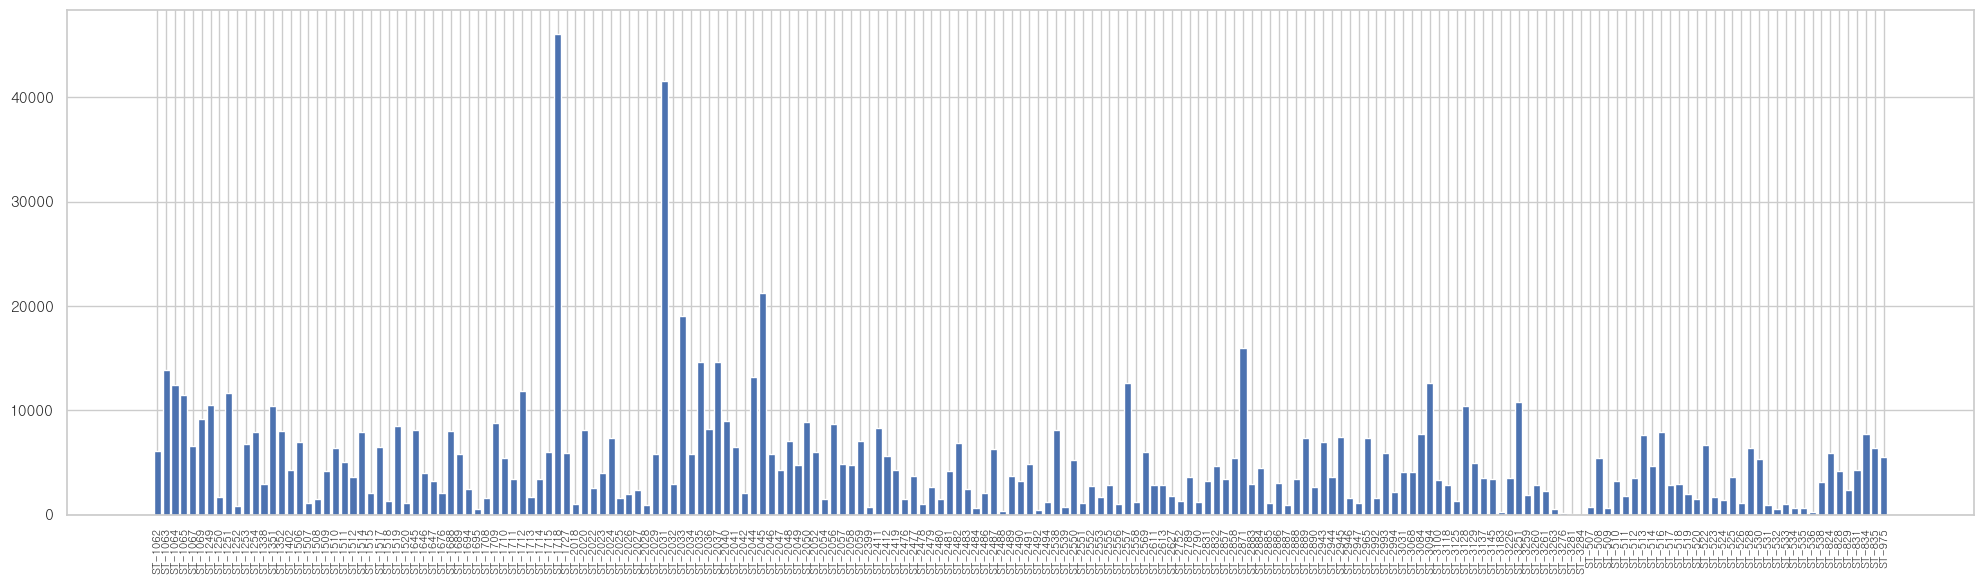

In [127]:
fig, ax = plt.subplots(figsize = (20,6))

ax.bar(출퇴근_통합정보['대여소_ID'], 출퇴근_통합정보['총이용량(출)'])
plt.xticks(rotation=90,fontsize=8)

plt.tight_layout()
plt.show()

In [128]:
강서_마스터정보.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소_ID  224 non-null    object 
 1   주소1     224 non-null    object 
 2   주소2     80 non-null     object 
 3   위도      224 non-null    float64
 4   경도      224 non-null    float64
dtypes: float64(2), object(3)
memory usage: 8.9+ KB


In [129]:
불일치_대여소 = 출퇴근_통합정보[출퇴근_통합정보['분류일치여부'] == '불일치']
불일치_대여소.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 17 to 192
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   대여소_ID    33 non-null     object
 1   지구분류(출)   33 non-null     object
 2   지구분류(퇴)   33 non-null     object
 3   분류일치여부    33 non-null     object
 4   시작(출)     33 non-null     int32 
 5   종료(출)     33 non-null     int32 
 6   차이(출)     33 non-null     int32 
 7   차이절대값(출)  33 non-null     int32 
 8   총이용량(출)   33 non-null     int32 
 9   시작(퇴)     33 non-null     int64 
 10  종료(퇴)     33 non-null     int64 
 11  차이(퇴)     33 non-null     int64 
 12  차이절대값(퇴)  33 non-null     int64 
 13  총이용량(퇴)   33 non-null     int64 
dtypes: int32(5), int64(5), object(4)
memory usage: 3.2+ KB


In [130]:
강서_마스터정보['대여소_ID'].values

array(['ST-975', 'ST-837', 'ST-836', 'ST-835', 'ST-834', 'ST-833',
       'ST-832', 'ST-831', 'ST-829', 'ST-828', 'ST-824', 'ST-538',
       'ST-537', 'ST-536', 'ST-535', 'ST-534', 'ST-533', 'ST-532',
       'ST-531', 'ST-530', 'ST-529', 'ST-528', 'ST-527', 'ST-526',
       'ST-525', 'ST-524', 'ST-523', 'ST-522', 'ST-521', 'ST-520',
       'ST-519', 'ST-518', 'ST-517', 'ST-516', 'ST-515', 'ST-514',
       'ST-513', 'ST-512', 'ST-511', 'ST-510', 'ST-509', 'ST-508',
       'ST-507', 'ST-3284', 'ST-3281', 'ST-3276', 'ST-3263', 'ST-3261',
       'ST-3260', 'ST-3259', 'ST-3251', 'ST-3226', 'ST-3183', 'ST-3145',
       'ST-3137', 'ST-3129', 'ST-3128', 'ST-3125', 'ST-3118', 'ST-3100',
       'ST-3094', 'ST-3084', 'ST-3068', 'ST-3031', 'ST-2994', 'ST-2993',
       'ST-2992', 'ST-2965', 'ST-2947', 'ST-2946', 'ST-2945', 'ST-2944',
       'ST-2943', 'ST-2890', 'ST-2889', 'ST-2888', 'ST-2887', 'ST-2886',
       'ST-2885', 'ST-2884', 'ST-2883', 'ST-2871', 'ST-2858', 'ST-2857',
       'ST-2832', 'ST

In [131]:
불일치_대여소['대여소_ID']

17     ST-1507
19     ST-1509
22     ST-1512
28     ST-1520
32     ST-1676
35     ST-1694
45     ST-1718
47     ST-2018
48     ST-2020
55     ST-2028
65     ST-2041
71     ST-2048
77     ST-2057
84     ST-2476
91     ST-2483
110    ST-2558
115    ST-2752
120    ST-2857
129    ST-2889
135    ST-2947
144    ST-3100
162     ST-508
163     ST-509
167     ST-513
172     ST-519
173     ST-520
175     ST-523
178     ST-526
179     ST-528
181     ST-531
184     ST-534
190     ST-829
192     ST-834
Name: 대여소_ID, dtype: object

In [132]:
강서_마스터정보['대여소_ID'].isin(불일치_대여소['대여소_ID'])

0      False
1      False
2      False
3      False
4       True
       ...  
219    False
220    False
221    False
222    False
223    False
Name: 대여소_ID, Length: 224, dtype: bool

In [133]:
for i in list(불일치_대여소['대여소_ID']):
    print(i)

ST-1507
ST-1509
ST-1512
ST-1520
ST-1676
ST-1694
ST-1718
ST-2018
ST-2020
ST-2028
ST-2041
ST-2048
ST-2057
ST-2476
ST-2483
ST-2558
ST-2752
ST-2857
ST-2889
ST-2947
ST-3100
ST-508
ST-509
ST-513
ST-519
ST-520
ST-523
ST-526
ST-528
ST-531
ST-534
ST-829
ST-834


In [134]:
강서_마스터정보['대여소_ID'].index

RangeIndex(start=0, stop=224, step=1)

In [135]:
불일치_대여소['대여소_ID']

17     ST-1507
19     ST-1509
22     ST-1512
28     ST-1520
32     ST-1676
35     ST-1694
45     ST-1718
47     ST-2018
48     ST-2020
55     ST-2028
65     ST-2041
71     ST-2048
77     ST-2057
84     ST-2476
91     ST-2483
110    ST-2558
115    ST-2752
120    ST-2857
129    ST-2889
135    ST-2947
144    ST-3100
162     ST-508
163     ST-509
167     ST-513
172     ST-519
173     ST-520
175     ST-523
178     ST-526
179     ST-528
181     ST-531
184     ST-534
190     ST-829
192     ST-834
Name: 대여소_ID, dtype: object

In [136]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴)
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423


In [137]:
출퇴근_통합정보.columns

Index(['대여소_ID', '지구분류(출)', '지구분류(퇴)', '분류일치여부', '시작(출)', '종료(출)', '차이(출)',
       '차이절대값(출)', '총이용량(출)', '시작(퇴)', '종료(퇴)', '차이(퇴)', '차이절대값(퇴)',
       '총이용량(퇴)'],
      dtype='object')

In [138]:
len(출퇴근_통합정보['차이절대값(출)'] + 출퇴근_통합정보['차이절대값(퇴)'])

195

In [139]:
출퇴근_통합정보['차이절대값합'] = 출퇴근_통합정보['차이절대값(출)'] + 출퇴근_통합정보['차이절대값(퇴)']

In [140]:
출퇴근_통합정보['총이용량합'] = 출퇴근_통합정보['총이용량(출)'] + 출퇴근_통합정보['총이용량(퇴)']

In [141]:
출퇴근_통합정보

,대여소_ID,지구분류(출),지구분류(퇴),분류일치여부,시작(출),종료(출),차이(출),차이절대값(출),총이용량(출),시작(퇴),종료(퇴),차이(퇴),차이절대값(퇴),총이용량(퇴),차이절대값합,총이용량합
0,ST-1062,주거,주거,일치,3817,2303,1514,1514,6120,4052,5420,-1368,1368,9472,2882,15592
1,ST-1063,업무,업무,일치,5061,8806,-3745,3745,13867,5762,3109,2653,2653,8871,6398,22738
2,ST-1064,업무,업무,일치,3900,8571,-4671,4671,12471,8962,5449,3513,3513,14411,8184,26882
3,ST-1065,주거,주거,일치,5849,5590,259,259,11439,14935,16778,-1843,1843,31713,2102,43152
4,ST-1067,주거,주거,일치,3604,2990,614,614,6594,2700,3810,-1110,1110,6510,1724,13104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ST-829,주거,업무,불일치,1344,1005,339,339,2349,1956,1923,33,33,3879,372,6228
191,ST-831,주거,주거,일치,2732,1538,1194,1194,4270,4079,4576,-497,497,8655,1691,12925
192,ST-834,업무,주거,불일치,3344,4368,-1024,1024,7712,6339,6460,-121,121,12799,1145,20511
193,ST-835,주거,주거,일치,4274,2164,2110,2110,6438,5497,7926,-2429,2429,13423,4539,19861


In [155]:
출근주거 = 출퇴근_통합정보[출퇴근_통합정보['지구분류(출)'] == '주거']
출근업무 = 출퇴근_통합정보[출퇴근_통합정보['지구분류(출)'] == '업무']

In [154]:
출근주거['차이절대값합']

0      2882
3      2102
4      1724
5      4196
8      1058
       ... 
189    2253
190     372
191    1691
193    4539
194    1199
Name: 차이절대값합, Length: 122, dtype: int64

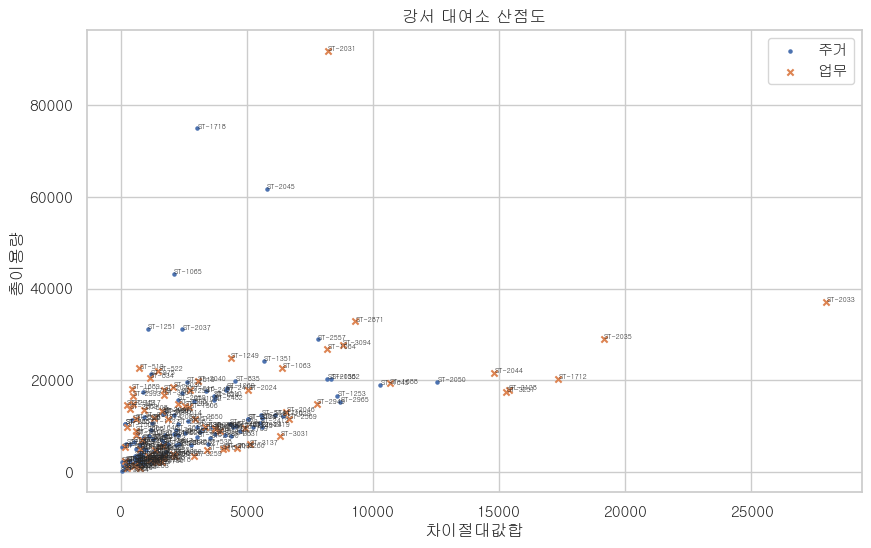

In [160]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(출근주거['차이절대값합'], 출근주거['총이용량합'], label = '주거', marker='.', s=20)
ax.scatter(출근업무['차이절대값합'], 출근업무['총이용량합'], label = '업무', marker='x', s=20)

for i, txt in enumerate(출퇴근_통합정보['대여소_ID']):
    plt.annotate(txt, (출퇴근_통합정보['차이절대값합'][i], 출퇴근_통합정보['총이용량합'][i]), fontsize=5)

plt.title('강서 대여소 산점도')
plt.xlabel('차이절대값합')
plt.ylabel('총이용량')

plt.legend(loc='best')

plt.show()

In [143]:
# import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# import pandas as pd
# import matplotlib.font_manager as fm

In [144]:
# sns.set_style('whitegrid')
# sns.scatterplot(x=출퇴근_통합정보['차이절대값합'], y=출퇴근_통합정보['총이용량합'])
# plt.title('강서 대여소 산점도')
# plt.xlabel('차이절대값합')
# plt.ylabel('총이용량')

# plt.show()

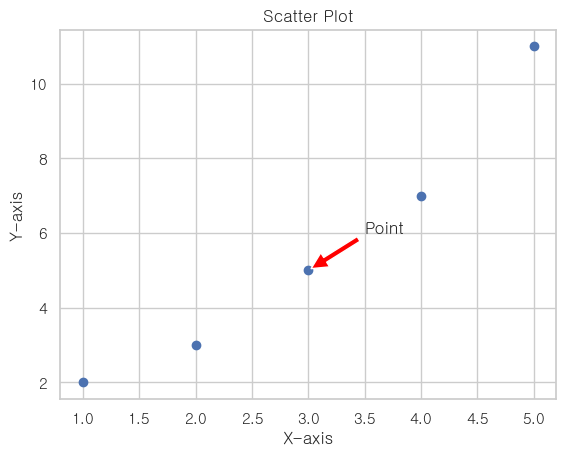

In [146]:
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 산점도 그리기
plt.scatter(x, y)

# 주석 추가
plt.annotate('Point', xy=(3, 5), xytext=(3.5, 6),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# 그래프 표시
plt.show()